# Now we will try to consider the different tracks and different positions of cyclist in different races

First of all we need to merge the 2 datasets and to remove the columns that we've seen are not good enough or useless

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import os
import sys
sys.path.append('../dataset/')
sys.path.append('../utility/')

from utility.data_understanding import *

In [3]:
cyclist_df = pd.read_csv(os.path.join('dataset','cyclists.csv'))
races_df = pd.read_csv(os.path.join('dataset','races.csv'))

In [4]:
merged_df = pd.merge(races_df, cyclist_df, left_on='cyclist', right_on='_url', how='inner')
merged_df.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,norway-1987,0.0,gerrie-knetemann,Gerrie Knetemann,1951.0,NaN,NaN,Netherlands
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,NaN,0.0,rene-bittinger,René Bittinger,1954.0,69.0,174.0,France
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,navigare-blue-storm-1993,0.0,joseph-bruyere,Joseph Bruyère,1948.0,NaN,NaN,Belgium
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,spain-1991,0.0,sven-ake-nilsson,Sven-Åke Nilsson,1951.0,63.0,172.0,Sweden


In [5]:
# Display all column names in the merged_df DataFrame
merged_df.columns

Index(['_url_x', 'name_x', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'average_temperature', 'date',
       'position', 'cyclist', 'cyclist_age', 'is_tarmac', 'is_cobbled',
       'is_gravel', 'cyclist_team', 'delta', '_url_y', 'name_y', 'birth_year',
       'weight', 'height', 'nationality'],
      dtype='object')

In [6]:
# Drop some columns and rename others
columns_to_drop = ['name_y', 'cyclist', 'name_x', 'is_cobbled', 'is_gravel']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df = merged_df.rename(columns={'_url_y': '_url_cyclist', '_url_x': '_url_race'})
merged_df.head()

,_url_race,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist_age,is_tarmac,cyclist_team,delta,_url_cyclist,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,22.0,True,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,27.0,True,norway-1987,0.0,gerrie-knetemann,1951.0,NaN,NaN,Netherlands
2,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,24.0,True,NaN,0.0,rene-bittinger,1954.0,69.0,174.0,France
3,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,30.0,True,navigare-blue-storm-1993,0.0,joseph-bruyere,1948.0,NaN,NaN,Belgium
4,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,27.0,True,spain-1991,0.0,sven-ake-nilsson,1951.0,63.0,172.0,Sweden


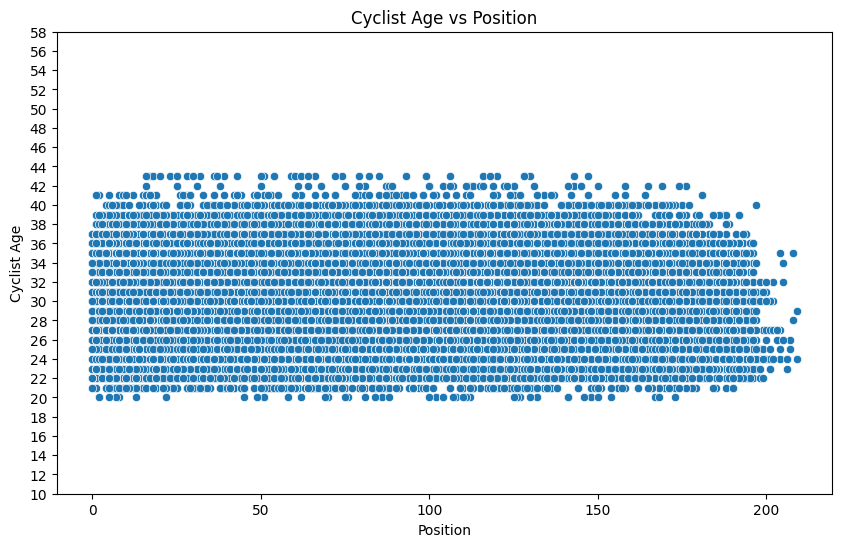

In [7]:

some_races = merged_df[merged_df['_url_race'].apply(lambda url: 'tour-de-france' in url)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=some_races, x='position', y='cyclist_age')
plt.title('Cyclist Age vs Position')
plt.xlabel('Position')
plt.ylabel('Cyclist Age')
plt.yticks(np.arange(10, 60, 2))
plt.show()

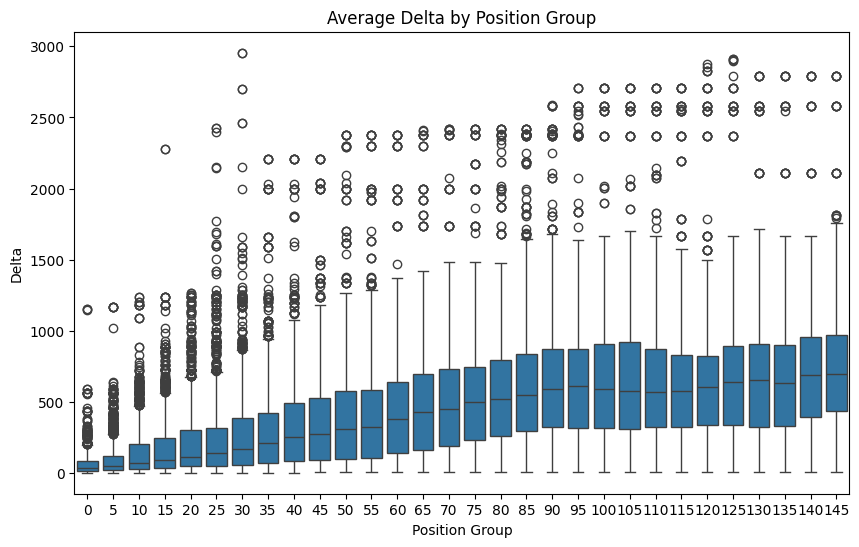

In [8]:
# Filter the data for the first 10 positions and non-zero delta values
filtered_df = merged_df[(merged_df['position'] < 150) & (merged_df['delta'] != 0) & (merged_df['delta'] < 3000) & (merged_df['delta'] > -100)]

# Filter the data for races that are within a given length range
length_range = (250000, 2500000)  # Example length range in meters
filtered_df = filtered_df[(filtered_df['length'] >= length_range[0]) & (filtered_df['length'] <= length_range[1])]

# Create a new column 'position_group' that groups positions in intervals of 5
filtered_df['position_group'] = (filtered_df['position'] // 5) * 5

# Plot the box plot for the average delta by position group
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='position_group', y='delta')
plt.title('Average Delta by Position Group')
plt.xlabel('Position Group')
plt.ylabel('Delta')
plt.show()


PippoPero.txt

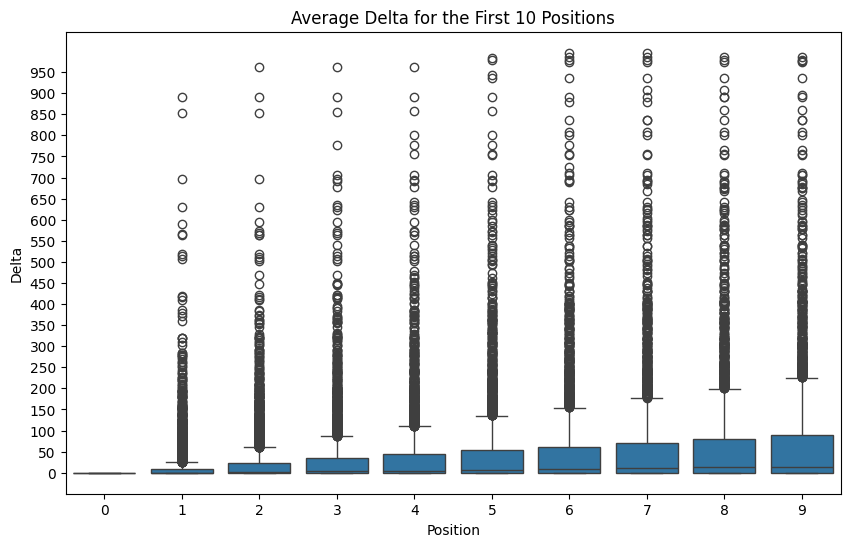

In [9]:
# Filter the data for the first 10 positions and non-zero delta values
filtered_df = merged_df[(merged_df['position'] < 10) & (merged_df['delta'] < 1000) & (merged_df['delta'] > -100)]

# Filter the data for races that are within a given length range
length_range = (150000, 250000)  # Example length range in meters
filtered_df = filtered_df[(filtered_df['length'] >= length_range[0]) & (filtered_df['length'] <= length_range[1])]

# Plot the box plot for the average delta
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='position', y='delta')
plt.title('Average Delta for the First 10 Positions')
plt.xlabel('Position')
plt.ylabel('Delta')
plt.yticks(np.arange(0, 1000, 50))
plt.show()

We need to remove negative values, too big values, and also, there is a more tricky problem... how many people can arrive at the same time (if we are measuring intervals of 1 second probably a bunch) for shure not 100, we need to understand what is a reeasonable group size in order to avoid considering akwardly big groups in future analysis

Another problem is: how small should be the delta like reasonably can someone arrive 3 hours later than the first person? probably yes in very long races, but probably not in shorter races, this means we should do different analysis based on teh different length

## Understand and clean delta values

As we said previously there are multiple problems with this feature, that are not trivial to handle and probably impossible to fix without using common sense (i.e. we need to think waht values are reasonable and what are not). the problems are not simply high values, delta equal to zero and negative values. The main problem I'veencountered up to now is the fact that many cyclists get the same delta which is very unlikely, sometimes at the limit of what is phisically possible: let's see all of this step by step.

To be extra safe, let's reupload the data from the files this will allow us also to run just this part of the notebook (the creationof another notebook just for this can be suitable)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append('../dataset/')
sys.path.append('../utility/')

races_df = pd.read_csv(os.path.join('dataset','races.csv'))
columns_to_drop = ['uci_points', 'is_cobbled', 'is_gravel', 'uci_points', 'name', 'cyclist_age']
races_df.drop(columns=columns_to_drop, inplace=True)
races_df.head(110)

,_url,points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,is_tarmac,cyclist_team,delta
0,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,True,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,True,norway-1987,0.0
2,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,True,NaN,0.0
3,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,True,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,True,spain-1991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,tour-de-france/1978/stage-6,100.0,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:03:28,105,paul-sherwen,True,radio-popular-paredes-boavista-2023,64.0
106,vuelta-a-espana/2016/stage-14,80.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 05:43:24,0,robert-gesink,True,new-zealand-1991,0.0
107,vuelta-a-espana/2016/stage-14,80.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 05:43:31,1,kenny-elissonde,True,canada-1996,7.0
108,vuelta-a-espana/2016/stage-14,80.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 05:43:33,2,egor-silin,True,switzerland-1997,9.0


**TODO** New feature: the duration of the race (2nd part of date column, the one with the time)

In [11]:
races_df['cyclist'].value_counts()

cyclist
matteo-tosatto           959
alejandro-valverde       942
luis-leon-sanchez        899
haimar-zubeldia          883
imanol-erviti            883
                        ... 
albert-van-midden          1
bernard-van-der-linde      1
serge-lapebie              1
walter-schoonjans          1
roland-smet                1
Name: count, Length: 6095, dtype: int64

Now we know how many races a cyclis runned... but... there is a correlation with how good he is?

**TODO**: Add a feature, to each cyclist, that is n° of won "competitions" (in broad sense) per n° of "competitions" attended. (vittorie/partecipazioni)
**TODO #2**: Add a feature, to each cyclist: punti in carriera (aka tutti i punti accumulati da ciclisti)

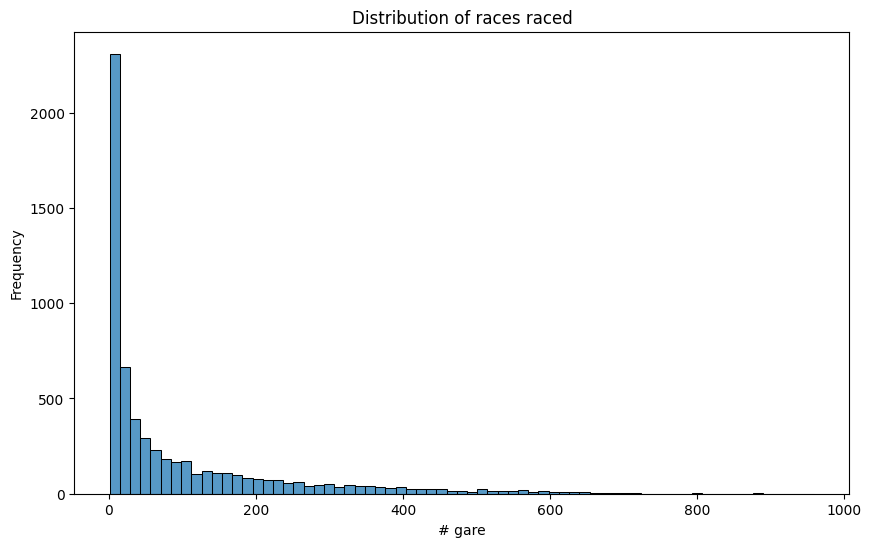

In [12]:
cyclist_races = races_df['cyclist'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(cyclist_races, kde=False)
plt.title('Distribution of races raced')
plt.xlabel('# gare')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.show()

In [13]:
len(races_df['_url'].unique())

5281

In [14]:
# we are cgoing to do things in a for loop, this will probably be a bit slow, but it is not my fault, it is python's fault
groups = []#this will contain (race_id, group_delta, group_size)
for index, row in races_df.iterrows():
    # first of all we create a list of the "groups" length 
    # (we define a group as a sequence of people that have the same delta)
    if len(groups) == 0:
        groups.append((row['_url'], row['delta'], 1))
    else:
        if groups[-1][1] == row['delta'] and groups[-1][0] == row['_url']:
            groups[-1] = (row['_url'], row['delta'], groups[-1][2] + 1)
        else:
            groups.append((row['_url'], row['delta'], 1))            
print('Groups:', groups[0:4])

Groups: [('tour-de-france/1978/stage-6', 0.0, 5), ('tour-de-france/1978/stage-6', 27.0, 100), ('tour-de-france/1978/stage-6', 64.0, 1), ('vuelta-a-espana/2016/stage-14', 0.0, 1)]


Number of groups: 141362


Text(0, 0.5, 'Frequency (log scale)')

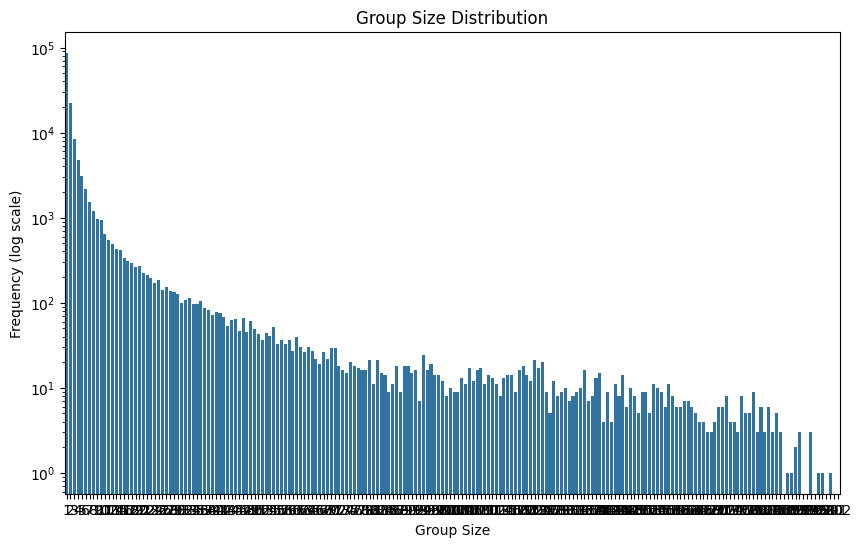

In [15]:
import numpy as np
print('Number of groups:', len(groups))

group_count = np.zeros(203)
for group in groups:
    if group[2] < 203:
        group_count[group[2]] += 1

plt.figure(figsize=(10, 6))
sns.barplot(x=range(1, 203), y=group_count[1:])
plt.yscale('log')
plt.title('Group Size Distribution')
plt.xlabel('Group Size')
plt.ylabel('Frequency (log scale)')


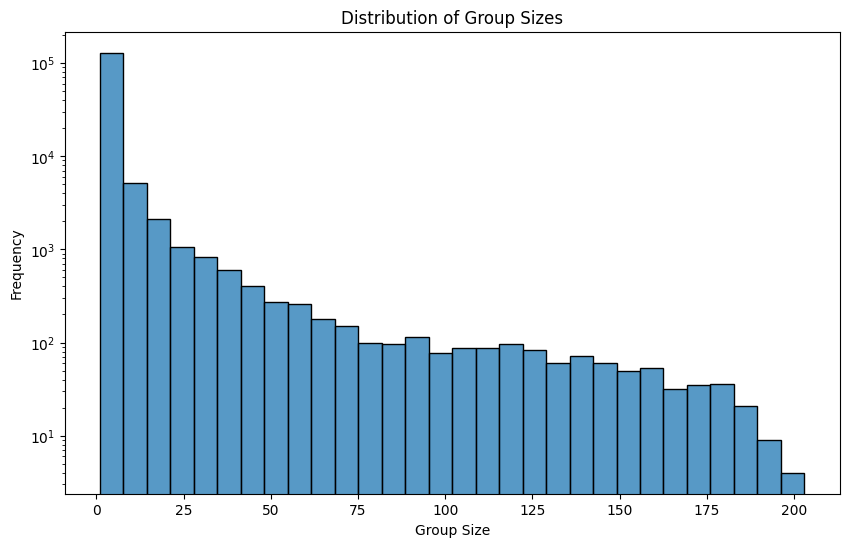

In [16]:
# Extract group sizes
group_sizes = [group[2] for group in groups]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(group_sizes, bins=30, kde=False)
plt.title('Distribution of Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


10 person can probably arrive all toghether at the same time? I actually don't know but it seams reasonable, in any case I think it make sense to consider wrong the groups that are above this threshold in future analysis and don't take thore races into account. This is actually a question we should ask to Setzu

In [17]:
races_df[races_df['delta'] > 30000].sort_values(by='delta')

,_url,points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,is_tarmac,cyclist_team,delta
349238,giro-d-italia/2008/stage-19,80.0,228000.0,3480.0,5.0,1058,NaN,2008-05-30 15:21:32,56,mauro-facci,True,magniflex-1977,31440.0
111016,giro-d-italia/2014/stage-14,80.0,164000.0,3691.0,5.0,892,NaN,2014-05-24 13:47:01,84,marco-frapporti,True,euskaltel-euskadi-2010,33140.0
586560,giro-d-italia/2014/stage-5,80.0,203000.0,2413.0,3.0,892,NaN,2014-05-14 14:48:01,171,tyler-farrar,True,united-states-1998,34522.0
586554,giro-d-italia/2014/stage-5,80.0,203000.0,2413.0,3.0,892,NaN,2014-05-14 14:48:02,165,elia-viviani,True,chazal-vetta-mbk-1993,34523.0
566590,giro-d-italia/2007/stage-4,80.0,154000.0,3433.0,5.0,844,NaN,2007-05-16 14:02:00,146,paride-grillo,True,NaN,34758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349272,giro-d-italia/2008/stage-19,80.0,228000.0,3480.0,5.0,1058,NaN,2008-05-30 19:30:32,90,jens-voigt,True,euskaltel-euskadi-2010,46380.0
349271,giro-d-italia/2008/stage-19,80.0,228000.0,3480.0,5.0,1058,NaN,2008-05-30 19:30:32,89,yuriy-krivtsov,True,bora-hansgrohe-2021,46380.0
349239,giro-d-italia/2008/stage-19,80.0,228000.0,3480.0,5.0,1058,NaN,2008-05-30 19:30:32,57,blaise-sonnery,True,bora-hansgrohe-2021,46380.0
349298,giro-d-italia/2008/stage-19,80.0,228000.0,3480.0,5.0,1058,NaN,2008-05-30 19:30:32,116,chris-anker-sorensen,True,euskaltel-euskadi-2010,46380.0


In [18]:
races_df.loc[races_df['delta'] > 30000, 'delta'].unique()

array([33140., 31440., 46380., 61547., 34758., 34523., 34522.])

In [19]:
races_df.loc[races_df['delta'].apply(lambda razza: razza in [33140., 31440., 46380., 61547., 34758., 34523., 34522.]), '_url'].unique()

array(['giro-d-italia/2014/stage-14', 'giro-d-italia/2008/stage-19',
       'itzulia-basque-country/2001/stage-5b',
       'giro-d-italia/2007/stage-4', 'giro-d-italia/2014/stage-5'],
      dtype=object)

In [20]:
races_df.loc[races_df['_url'] == 'giro-d-italia/2008/stage-19', ['cyclist', 'date', 'delta']]

,cyclist,date,delta
349182,vasil-kiryienka,2008-05-30 06:37:32,0.0
349183,danilo-di-luca,2008-05-30 06:42:08,276.0
349184,alexander-efimkin,2008-05-30 06:42:15,283.0
349185,stephen-cummings,2008-05-30 06:42:57,325.0
349186,riccardo-ricco,2008-05-30 06:43:16,344.0
...,...,...,...
349320,joan-horrach,2008-05-30 19:30:32,46380.0
349321,bradley-wiggins,2008-05-30 19:30:32,46380.0
349322,danny-pate,2008-05-30 19:30:32,46380.0
349323,philip-deignan,2008-05-30 19:30:32,46380.0


Guarda il trollino... Sig. Forconi???

In [21]:
races_df[races_df['_url'].apply(lambda url: url == 'itzulia-basque-country/2001/stage-5b')]

,_url,points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,is_tarmac,cyclist_team,delta
375746,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:14:53,0,raimondas-rumsas-1,True,ville-de-charleroi-new-systems-2000,0.0
375747,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:14:58,1,jose-alberto-martinez,True,NaN,5.0
375748,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:15:00,2,marcos-antonio-serrano,True,NaN,7.0
375749,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:15:00,3,david-etxebarria,True,germany-2004,7.0
375750,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:15:02,4,juan-carlos-dominguez,True,hungary-2002,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375863,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:17:45,117,fabio-testi,True,NaN,172.0
375864,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:17:58,118,massimo-podenzana,True,colombia-selle-italia-2002,185.0
375865,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:18:05,119,kai-hundertmarck,True,NaN,192.0
375866,itzulia-basque-country/2001/stage-5b,50.0,10000.0,NaN,NaN,898,NaN,2001-04-14 00:18:19,120,riccardo-forconi,True,NaN,206.0


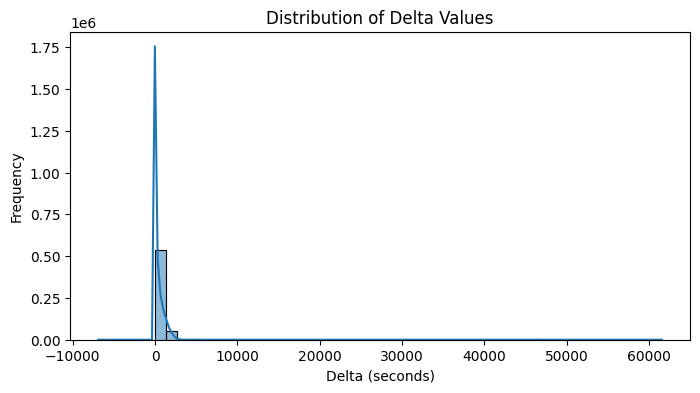

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(races_df['delta'], bins=50, kde=True)
plt.title('Distribution of Delta Values')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')
plt.show()

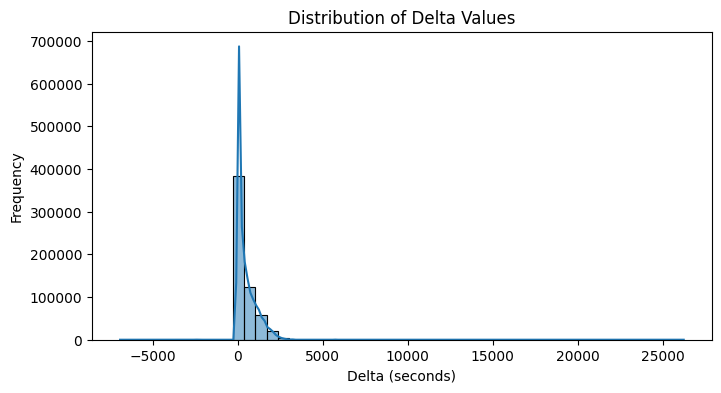

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(races_df.loc[races_df['delta'] < 30000, 'delta'], bins=50, kde=True)
plt.title('Distribution of Delta Values')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')
plt.show()

this is terrifying...

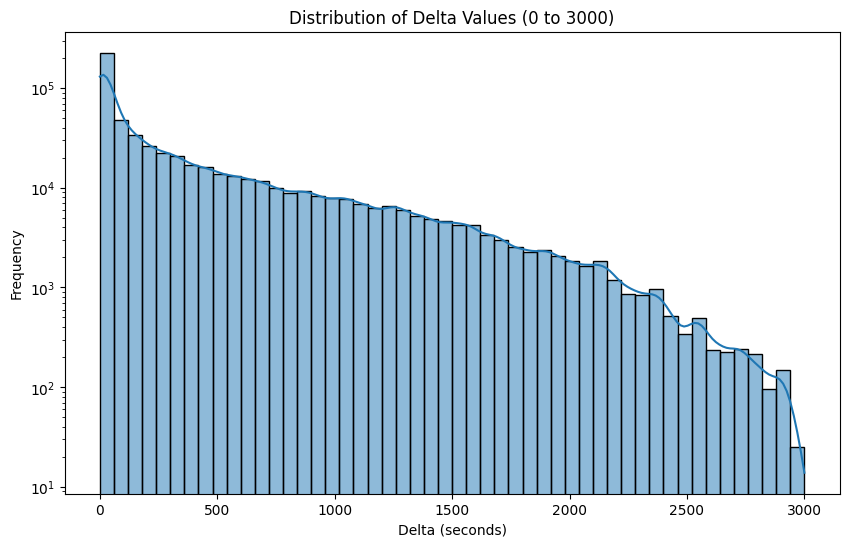

In [24]:
# Filter the data for delta values in the range 0 to 3000
filtered_delta_df = races_df[(races_df['delta'] >= 0) & (races_df['delta'] <= 3000)]

# Plot the histogram for the filtered delta values
plt.figure(figsize=(10, 6))
sns.histplot(filtered_delta_df['delta'], bins=50, kde=True)
plt.title('Distribution of Delta Values (0 to 3000)')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In order to probably improve this feature quality:
- restrict the allowed range of delta
- remove too long groups
- do not consider the first man of a race if is alone

Ideally all of the above cases should be represented with NaN (probably all the race should be invalidated if there is a too big group)

We'll do this on the array we created for computational reason

**TODO** Reconsider this thing of too big groups...

In [25]:
# Easy preliminary filtering
filtered_groups = [
    group for group in groups
    if 3000 < group[1] <= 70000 and not (group[2] == 1 and group[1] == 0)
]
# Filter out races with too big groups
too_big_groups_races = set()
for group in filtered_groups:
    if group[2] > 10000:
        too_big_groups_races.add(group[0])
filtered_groups = [
    group for group in filtered_groups
    if group[0] not in too_big_groups_races
]

print('Filtered Groups:', filtered_groups[:10])
print('Number of groups:', len(groups))
print('Number of filtered groups:', len(filtered_groups))
print(too_big_groups_races)

Filtered Groups: [('tour-de-france/1985/stage-10', 3811.0, 1), ('tour-de-suisse/2001/stage-1', 18006.0, 1), ('tour-de-france/1982/stage-17', 3269.0, 1), ('dauphine/2001/stage-6', 3040.0, 1), ('dauphine/2001/stage-6', 3064.0, 1), ('dauphine/2001/stage-6', 3148.0, 1), ('dauphine/2001/stage-6', 3174.0, 2), ('giro-d-italia/2022/stage-16', 3191.0, 8), ('tour-de-france/1983/stage-18', 3219.0, 1), ('tour-de-france/1983/stage-18', 3229.0, 1)]
Number of groups: 141362
Number of filtered groups: 85
set()


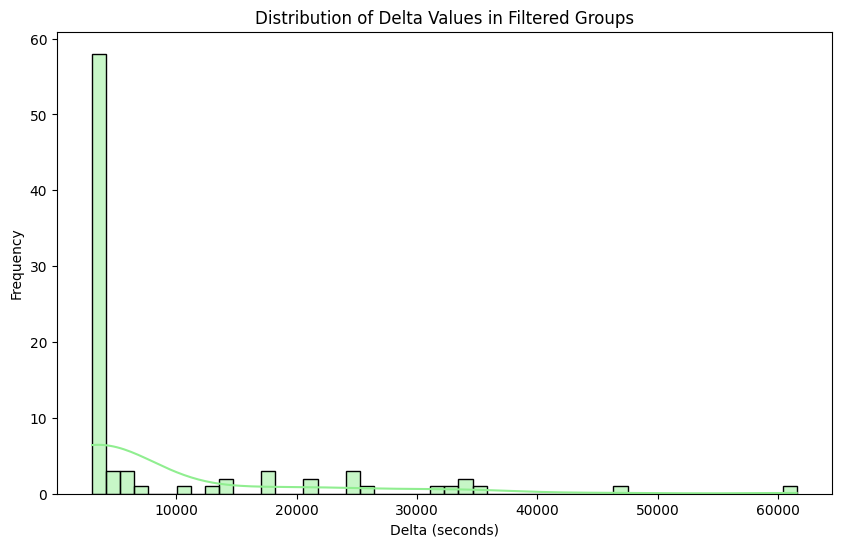

In [26]:
# Extract delta values from filtered groups
filtered_delta_values = [group[1] for group in filtered_groups]

# Create a histogram plot for the delta values
plt.figure(figsize=(10, 6))
sns.histplot(filtered_delta_values, bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Delta Values in Filtered Groups')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.show()

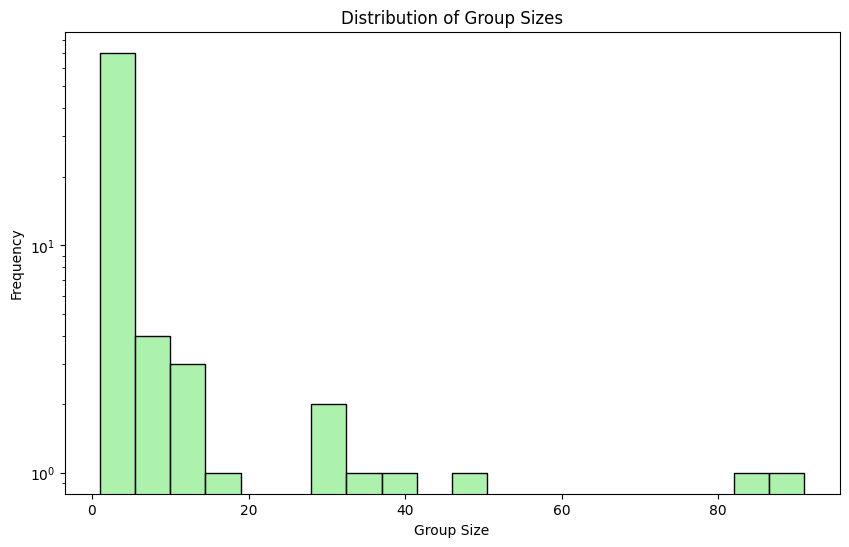

In [27]:
# Extract group sizes
group_sizes = [group[2] for group in filtered_groups]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(group_sizes, bins=20, kde=False, color='lightgreen')
plt.title('Distribution of Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

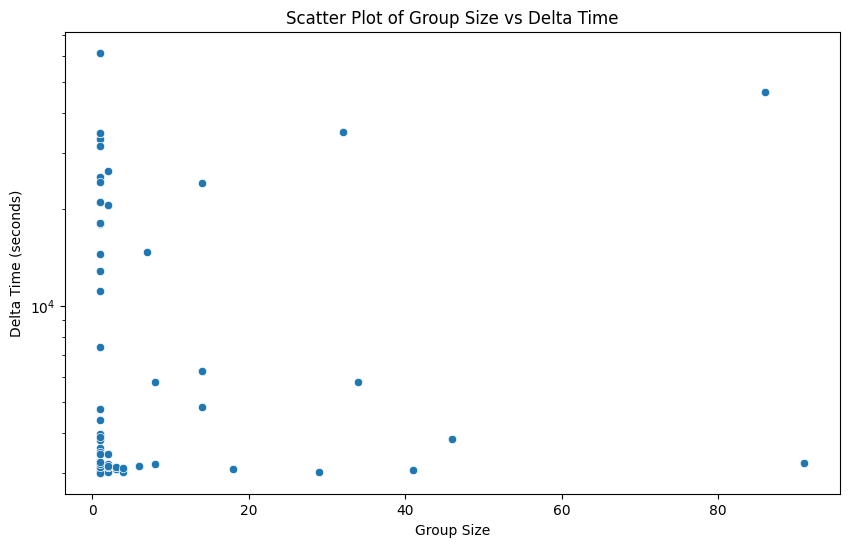

In [28]:
# Extract delta values and group sizes from filtered groups
filtered_delta_values = [group[1] for group in filtered_groups]
group_sizes = [group[2] for group in filtered_groups]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=group_sizes, y=filtered_delta_values)
plt.title('Scatter Plot of Group Size vs Delta Time')
plt.xlabel('Group Size')
plt.ylabel('Delta Time (seconds)')
plt.yscale('log')
plt.show()

Personally I like this 2 plots more, but I actually have no idea if this are really as meaningfull as i hope they are

# No To Racism